In [25]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from google.colab import files

In [3]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
# Upload file
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")

Saving Restaurant_Reviews 1.tsv to Restaurant_Reviews 1.tsv
Uploaded file: Restaurant_Reviews 1.tsv


In [12]:
df = pd.read_csv('/content/Restaurant_Reviews 1.tsv', delimiter='\t', quoting=3)
print(df.head())
print("Dataset Shape:", df.shape)

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
Dataset Shape: (1000, 2)


In [13]:
# Initialize PorterStemmer and WordNetLemmatizer
ps = PorterStemmer()
lemma = WordNetLemmatizer()

# Create an empty list for the cleaned reviews
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if word not in set(stopwords.words('english'))]
    review_words = [ps.stem(word) for word in review_words]
    review = ' '.join(review_words)
    corpus.append(review)

print("Cleaned Reviews:", corpus[:10])

Cleaned Reviews: ['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch']


In [14]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
y = df['Liked']

# Convert to DataFrame
tfidf_df = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.tail())

     absolut  absolutley  accid  accommod  accomod  accordingli  account  ach  \
995      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
996      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
997      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
998      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   
999      0.0         0.0    0.0       0.0      0.0          0.0      0.0  0.0   

     acknowledg  actual  ...  yeah  year  yellow  yellowtail  yelper  yucki  \
995         0.0     0.0  ...   0.0   0.0     0.0         0.0     0.0    0.0   
996         0.0     0.0  ...   0.0   0.0     0.0         0.0     0.0    0.0   
997         0.0     0.0  ...   0.0   0.0     0.0         0.0     0.0    0.0   
998         0.0     0.0  ...   0.0   0.0     0.0         0.0     0.0    0.0   
999         0.0     0.0  ...   0.0   0.0     0.0         0.0     0.0    0.0   

     yukon  yum  yummi  zero  
995    

In [15]:
# Standardization
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X.toarray())

In [16]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Sparse Matrix to Dense for GaussianNB
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [17]:
# Train and Evaluate Classifiers
# 1. GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_dense, y_train)
y_pred_gnb = clf_gnb.predict(X_test_dense)
print("\nGaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


GaussianNB Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.74      0.57      0.65        96
           1       0.67      0.82      0.74       104

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.69       200
weighted avg       0.71      0.70      0.69       200



In [18]:
# 2. MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)
y_pred_mnb = clf_mnb.predict(X_test)
print("\nMultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))


MultinomialNB Accuracy: 0.745
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        96
           1       0.75      0.77      0.76       104

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



In [19]:
# 3. BernoulliNB
clf_bnb = BernoulliNB()
clf_bnb.fit(X_train, y_train)
y_pred_bnb = clf_bnb.predict(X_test)
print("\nBernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))


BernoulliNB Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        96
           1       0.77      0.75      0.76       104

    accuracy                           0.76       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200



In [20]:
# 4. Logistic Regression
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.735
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        96
           1       0.81      0.63      0.71       104

    accuracy                           0.73       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.75      0.73      0.73       200



In [21]:
# 5. Random Forest
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.695
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        96
           1       0.81      0.54      0.65       104

    accuracy                           0.69       200
   macro avg       0.72      0.70      0.69       200
weighted avg       0.73      0.69      0.69       200



In [22]:
# 6. SVM
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


SVM Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        96
           1       0.83      0.66      0.74       104

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.75       200
weighted avg       0.77      0.76      0.75       200



In [26]:
# 7. XGBoost
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:12:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.685
              precision    recall  f1-score   support

           0       0.63      0.85      0.72        96
           1       0.80      0.53      0.64       104

    accuracy                           0.69       200
   macro avg       0.71      0.69      0.68       200
weighted avg       0.71      0.69      0.68       200



<ipython-input-27-e2f18aac59d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_accuracy, x="Model", y="Accuracy", palette="viridis", hue=None, legend=False)


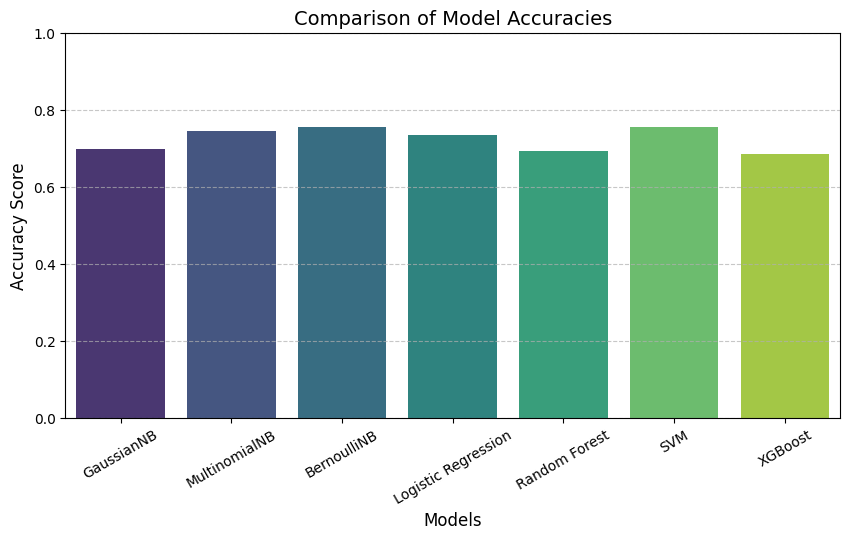

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy scores from the models
model_accuracies = {
    "GaussianNB": accuracy_score(y_test, y_pred_gnb),
    "MultinomialNB": accuracy_score(y_test, y_pred_mnb),
    "BernoulliNB": accuracy_score(y_test, y_pred_bnb),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svc),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

# Convert to DataFrame for seaborn
df_accuracy = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])

# Plot the accuracy comparison graph
plt.figure(figsize=(10, 5))
sns.barplot(data=df_accuracy, x="Model", y="Accuracy", palette="viridis", hue=None, legend=False)

# Customize the plot
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Comparison of Model Accuracies", fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the graph
plt.show()